In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [99]:
DB = pd.read_csv("Social_Network_Ads.csv")
DB

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [100]:
DB = pd.get_dummies(DB, columns=['Gender'], drop_first=True, dtype=int)
DB = DB.drop(columns=["User ID"])
DB.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Is male']
DB

,Age,EstimatedSalary,Purchased,Is male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [101]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(DB['Purchased'].copy())
X = DB.drop(columns=['Purchased'])

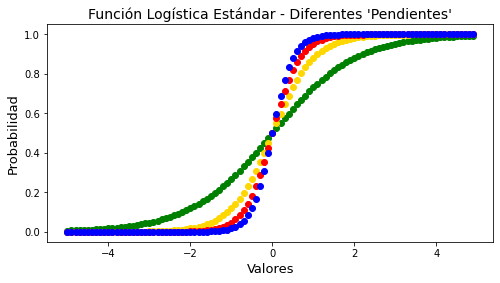

In [107]:
# Creamos una función logística vectorial (ufuncs)
logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1)

# Graficamos la función logística
plt.figure(figsize=(8, 4))

# Diferentes pendientes
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, np.arange(-5, 5, 0.1)),
           color="green")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 4, np.arange(-5, 5, 0.1)),
           color="blue")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()